In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys
import os
sys.path.append('packages/')
from utilities import *
from importlib import reload
#from utilities reload *
import utilities
import networkx as nx
import sdeint

/net/theorie/home/harsh/Work/code/netBound/packages/utilities.py:261: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if method is 'log':
/net/theorie/home/harsh/Work/code/netBound/packages/utilities.py:304: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if method is 'log':
/net/theorie/home/harsh/Work/code/netBound/packages/utilities.py:397: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if method is 'total':
/net/theorie/home/harsh/Work/code/netBound/packages/utilities.py:408: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif method is 'single':


In [3]:
plt.rcParams.update({'font.size': 16,'font.family':'arial'})

In [4]:
loaded = np.load("data/linear_network_dt_N_withError_T1.npy",allow_pickle=True).item()

In [5]:
loaded2 = np.load("data/linear_network_dt_N_withError_T0point2.npy",allow_pickle=True).item()

In [6]:
loaded3 = np.load("data/linear_network_dt_N_withError_T4.npy",allow_pickle=True).item()

In [7]:
dt_list, num_repeats_list, auc_list = loaded['dt_list'], loaded['num_reps'], loaded['auc_list']
dt_list2, num_repeats_list2, auc_list2 = loaded2['dt_list'], loaded2['num_reps'], loaded2['auc_list']
dt_list3, num_repeats_list3, auc_list3 = loaded3['dt_list'], loaded3['num_reps'], loaded3['auc_list']

## Plotting the results

In [8]:
from matplotlib import colors
from config.plot_config import *
import matplotlib as mpl

Text(0.5, 0, '$\\Delta t$')

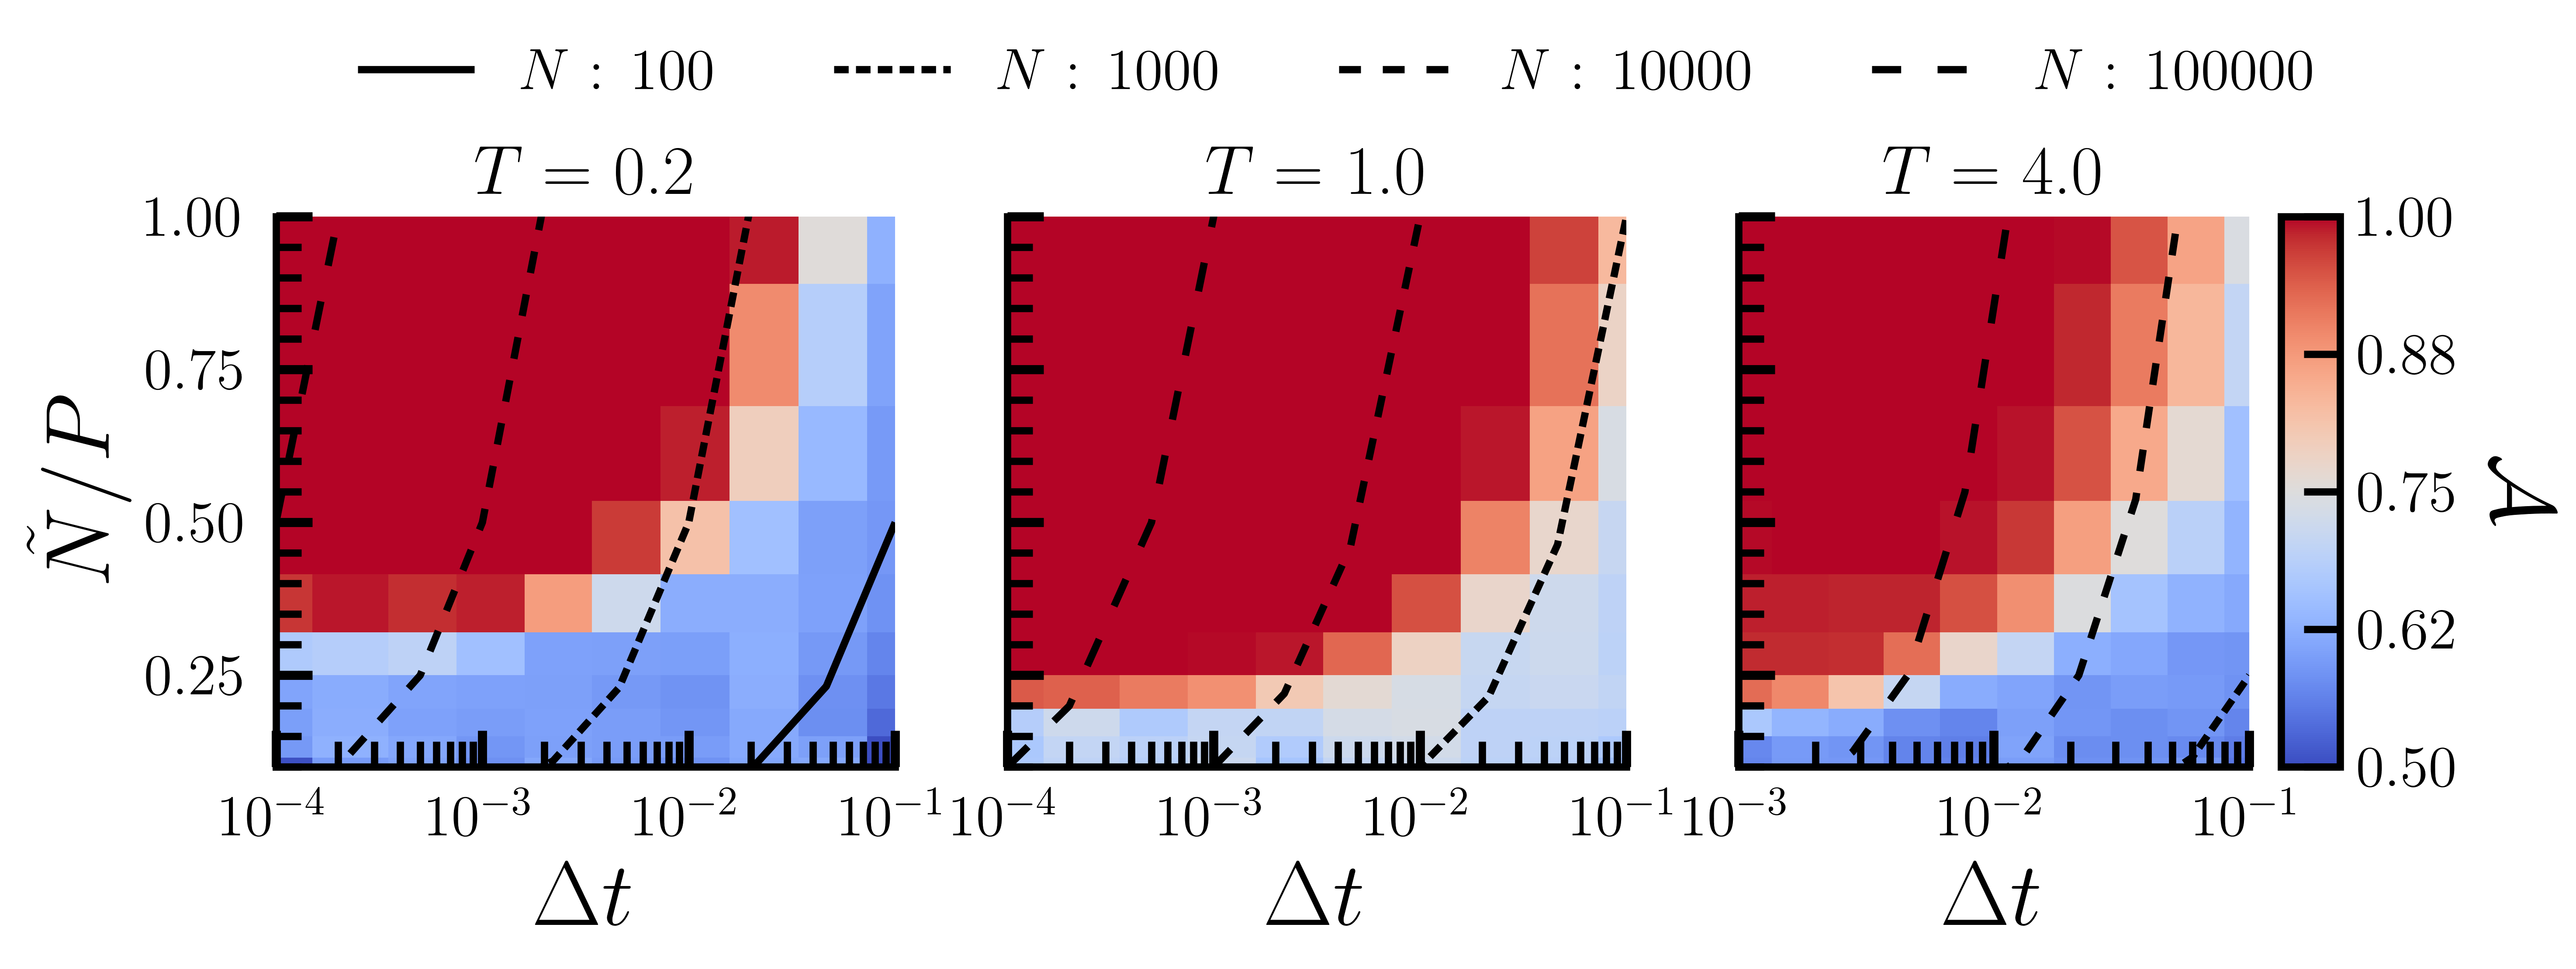

In [9]:
#dt_range2 = np.geomspace(h.dt_min, h.dt_max, 200)
#Nrun_range = range(1, int(h.Nruns_max+1))
#T_range = np.geomspace(h.T_min, h.T_max, int(h.T_num))

dt_range2 = dt_list
Nrun_range = num_repeats_list
T_range = [1,2]


fig = plt.figure(figsize=(9, 3.5), dpi=600)#(figsize=(7, 2.5))
dx_a, dy_a = .2625, .6
x_pos = .41
y_pos = .12

ax1 = fig.add_axes([.1, y_pos, dx_a, dy_a])
ax2 = fig.add_axes([x_pos, y_pos, dx_a, dy_a])
ax2_new = fig.add_axes([0.72, y_pos, dx_a*3.3/4, dy_a])
ax3 = fig.add_axes([.95, y_pos, .025, dy_a])

#ax4 = fig.add_axes([0, 0, dx_a, dy_a])
#ax5 = fig.add_axes([x_pos, 0, dx_a, dy_a])
#ax6 = fig.add_axes([.975, 0, .025, dy_a])

axes = [ax1, ax2]

levels = np.linspace(.5, 1, 20)

#idx_list_T = [0, -1]

#for idx_ax, (idx_T, T) in enumerate(zip(idx_list_T, T_range[idx_list_T])): 


# _auc = auc[idx_T]
# auc_min, auc_max = np.min(_auc[~np.isnan(_auc)]), np.max(_auc[~np.isnan(_auc)])

##ax = axes[idx_ax]

ax = ax2

# fig.patch.set_facecolor('white')

#ax.spines['right'].set_visible(True)
#ax.spines['top'].set_visible(True)

# Edit the major and minor ticks of the x and y 
# ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False, pad=10)
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in' , top=False, pad=10,)
# ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=False)
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in' , right=False)

# plt.title('AUC\nT={:.1f}'.format(T), size=25)

#CS = ax.contourf(dt_range, Nrun_range, auc[idx_T], norm=mpl.colors.Normalize(vmin=.5, vmax=1.0), levels=levels, cmap=mpl.cm.coolwarm)
CS = ax.pcolormesh(dt_list, num_repeats_list/100, auc_list, norm=mpl.colors.Normalize(vmin=.5, vmax=1.0), cmap=mpl.cm.coolwarm)
CS.set_clim(.5, 1.0)

T = 1
ax.autoscale(False)
def const_D(dt, D):  
    _Nruns = dt*D/T
    return _Nruns/100

line_styles = [(0,(1, 0)), (0, (2, 1)), (0, (3, 3)),(0, (4, 5))]

for i, D in enumerate([100,1000, 10000, 100000]): 
    ax.plot(dt_list, const_D(dt_list, D), ls=line_styles[i], label= s_data_points+ ' : {}'.format(D), lw=2, color='k')

ax.set_ylim((min(num_repeats_list)/100, max(num_repeats_list)/100))
ax.set_xlim((min(dt_list), max(dt_list)))
ax.set_xscale('log')

# ax.set_xticks(fontsize=20)
# ax.set_yticks(fontsize=20)
#ax.set_xlabel(r'$dt$')

#plt.clim(.5, 1.0)
#CS.set_clim(.5,1.0)
#CS.ax.set_yticklabels(levels.round(1))

ax.set_title(r'$T = $ ' + f'{T:.1f}')


ax = ax1

CS = ax.pcolormesh(dt_list, num_repeats_list/100, auc_list2, norm=mpl.colors.Normalize(vmin=.5, vmax=1.0), cmap=mpl.cm.coolwarm)
CS.set_clim(.5, 1.0)

T = 0.2
ax.autoscale(False)
def const_D(dt, D):  
    _Nruns = dt*D/T
    return _Nruns/100

line_styles = [(0,(1, 0)), (0, (2, 1)), (0, (3, 3)),(0, (4, 5))]

for i, D in enumerate([100,1000, 10000, 100000]): 
    ax.plot(dt_list, const_D(dt_list, D), ls=line_styles[i], label= s_data_points+ ' : {}'.format(D), lw=2, color='k')

ax.set_ylim((min(num_repeats_list)/100, max(num_repeats_list)/100))
ax.set_xlim((min(dt_list), max(dt_list)))
ax.set_xscale('log')

# ax.set_xticks(fontsize=20)
# ax.set_yticks(fontsize=20)
#ax.set_xlabel(r'$dt$')

#plt.clim(.5, 1.0)
#CS.set_clim(.5,1.0)
#CS.ax.set_yticklabels(levels.round(1))

ax.set_title(r'$T = $ ' + f'{T:.1f}')

ax = ax2_new

CS = ax.pcolormesh(dt_list3, num_repeats_list3/100, auc_list3, norm=mpl.colors.Normalize(vmin=.5, vmax=1.0), cmap=mpl.cm.coolwarm)
CS.set_clim(.5, 1.0)

T = 4.
ax.autoscale(False)
def const_D(dt, D):  
    _Nruns = dt*D/T
    return _Nruns/100

line_styles = [(0,(1, 0)), (0, (2, 1)), (0, (3, 3)),(0, (4, 5))]

for i, D in enumerate([100,1000, 10000, 100000]): 
    ax.plot(dt_list3, const_D(dt_list, D), ls=line_styles[i], label= s_data_points+ ' : {}'.format(D), lw=2, color='k')

ax.set_ylim((min(num_repeats_list3)/100, max(num_repeats_list3)/100))
ax.set_xlim((min(dt_list3), max(dt_list3)))
ax.set_xscale('log')

# ax.set_xticks(fontsize=20)
# ax.set_yticks(fontsize=20)
#ax.set_xlabel(r'$dt$')

#plt.clim(.5, 1.0)
#CS.set_clim(.5,1.0)
#CS.ax.set_yticklabels(levels.round(1))

ax.set_title(r'$T = $ ' + f'{T:.1f}')


ax1.set_ylabel(s_N_exp+r"$/P$")
ax2.legend(bbox_to_anchor=(2.2, 1.4), bbox_transform=ax2.transAxes, loc=1, frameon=False, ncols=4)#, fontsize=16)


#ax1.yaxis.set_major_locator(mpl.ticker.FixedLocator([20, 40, 60, 80, 100]))

#ax1.yaxis.set_major_locator(mpl.ticker.FixedLocator([0.2, 0.4, 0.6, 0.8, 1]))

#ax1.yaxis.set_minor_locator(mpl.ticker.FixedLocator([1, 3, 5, 7, 9]))

##ax2.yaxis.set_major_locator(mpl.ticker.FixedLocator([2, 4, 6, 8, 10]))
##ax2.yaxis.set_minor_locator(mpl.ticker.FixedLocator([1, 3, 5, 7, 9]))

ax2.yaxis.set_ticklabels([])
ax2_new.yaxis.set_ticklabels([])

cbar = fig.colorbar(CS, cax=ax3) #t.colorbar(cmap)
cbar.set_label(s_auc, labelpad=25, rotation=270)#, size=FONT_SIZE) 
cbar.ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=True, pad=5)
cbar.ax.yaxis.set_major_locator(mpl.ticker.LinearLocator(5))
cbar.ax.yaxis.set_major_formatter(lambda x, pos: f'{x:.2f}')
cbar.ax.yaxis.set_minor_locator(mpl.ticker.NullLocator())


ax1.set_xlabel(r'$\Delta t$')
ax2.set_xlabel(r'$\Delta t$')
ax2_new.set_xlabel(r'$\Delta t$')

#ax1.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
#ax2.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
#
########################### Lower Plots #############################




#### Labels ###
#ax1.text(.07, .87, r'$\textbold{(a)}$', transform=ax1.transAxes)
#ax2.text(.07, .87, r'$\textbold{(b)}$', transform=ax2.transAxes)

#ax1.text(.07, .87, r'$\boldsymbol{\text{(a)}}$', transform=ax1.transAxes)
#ax2.text(.07, .87, r'$\boldsymbol{\text{(b)}}$', transform=ax2.transAxes)

#ax4.text(.07, .87, r'$\textbf{(c)}$', transform=ax4.transAxes)
#ax5.text(.07, .87, r'$\textbf{(d)}$', transform=ax5.transAxes)


#plt.savefig("../pic_paper/par_meas_auc_labels.png",  transparent=False)
    